<a href="https://colab.research.google.com/github/siddhp4/Assignment-1-Q23-Basic-Statistics-Level-1-/blob/main/Assig_Random_Forest_Fraud_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
fraud = pd.read_csv("Fraud_check.csv")
print(fraud.head(10))
print("Shape =", fraud.shape)

  Undergrad Marital.Status  ...  Work.Experience  Urban
0        NO         Single  ...               10    YES
1       YES       Divorced  ...               18    YES
2        NO        Married  ...               30    YES
3       YES         Single  ...               15    YES
4        NO        Married  ...               28     NO
5        NO       Divorced  ...                0     NO
6        NO       Divorced  ...                8    YES
7       YES         Single  ...                3    YES
8        NO         Single  ...               12    YES
9       YES       Divorced  ...                4    YES

[10 rows x 6 columns]
Shape = (600, 6)


In [4]:
fraud.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599
Undergrad,NO,YES,NO,YES,NO,NO,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO,YES,YES,YES,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES,YES,NO,YES,YES,YES,YES,YES,NO,NO,NO,...,NO,NO,YES,YES,YES,NO,NO,YES,NO,YES,NO,NO,YES,YES,YES,NO,YES,YES,NO,YES,YES,YES,YES,NO,NO,NO,YES,NO,YES,YES,NO,YES,YES,NO,NO,YES,YES,NO,YES,NO
Marital.Status,Single,Divorced,Married,Single,Married,Divorced,Divorced,Single,Single,Divorced,Single,Single,Divorced,Married,Married,Divorced,Divorced,Married,Divorced,Single,Single,Divorced,Divorced,Single,Divorced,Divorced,Divorced,Single,Single,Divorced,Divorced,Divorced,Married,Single,Divorced,Married,Married,Married,Single,Married,...,Divorced,Married,Divorced,Married,Married,Divorced,Married,Single,Single,Single,Single,Single,Married,Married,Divorced,Divorced,Married,Married,Divorced,Single,Divorced,Divorced,Married,Married,Divorced,Single,Single,Single,Married,Married,Married,Single,Single,Divorced,Married,Divorced,Divorced,Divorced,Married,Divorced
Taxable.Income,68833,33700,36925,50190,81002,33329,83357,62774,83519,98152,29732,61063,11794,61830,64070,69869,24987,39476,97957,10987,88636,14310,78969,92040,38239,31417,55299,87778,10379,94033,73854,64007,97200,82071,12514,31336,10163,68513,14912,74010,...,90444,50403,78867,95920,41545,63912,92498,16316,68617,59860,55981,34833,39818,59227,44809,10735,50242,56166,42483,70572,31721,31085,84931,69036,42679,84557,54126,87685,85076,31633,43018,27394,68152,84775,47364,76340,69967,47334,98592,96519
City.Population,50047,134075,160205,193264,27533,116382,80890,131253,102481,155482,102602,94875,148033,86649,57529,107764,34551,57194,59269,126953,147222,29106,155342,50495,28495,124606,169128,28542,128766,41863,117788,147414,51911,157251,183767,41117,193995,66912,177575,54981,...,182562,36861,100064,116495,30098,31064,33460,129912,150036,38074,161629,95421,148068,116161,28768,95975,79653,52940,185339,125112,123335,57473,32907,28874,155684,137622,106230,154677,93242,30774,85195,132859,75143,131963,97526,39492,55369,154058,180083,158137
Work.Experience,10,18,30,15,28,0,8,3,12,4,19,6,14,16,13,29,29,25,6,30,26,7,14,12,30,27,15,12,5,30,0,21,23,21,1,30,5,5,3,16,...,24,29,12,6,11,28,28,30,22,12,29,7,13,20,29,13,15,5,6,7,1,10,12,19,4,2,30,26,27,10,14,18,16,10,9,7,2,0,17,16
Urban,YES,YES,YES,YES,NO,NO,YES,YES,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES,NO,YES,...,NO,YES,NO,YES,YES,NO,NO,NO,YES,YES,YES,YES,NO,NO,YES,YES,YES,YES,NO,YES,YES,YES,YES,NO,YES,YES,NO,YES,YES,NO,YES,YES,NO,YES,YES,YES,YES,YES,NO,NO


In [5]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


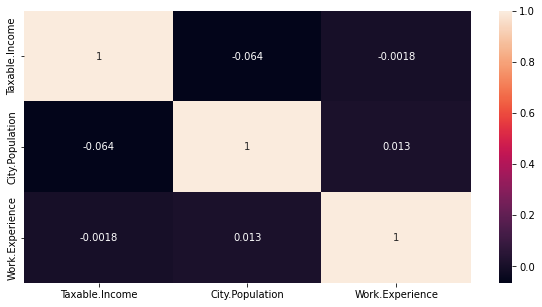

In [7]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(fraud.corr(),annot=True)

In [8]:
def distplot(param):
    plt.figure(figsize=(20,15))
    sns.distplot(fraud[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()

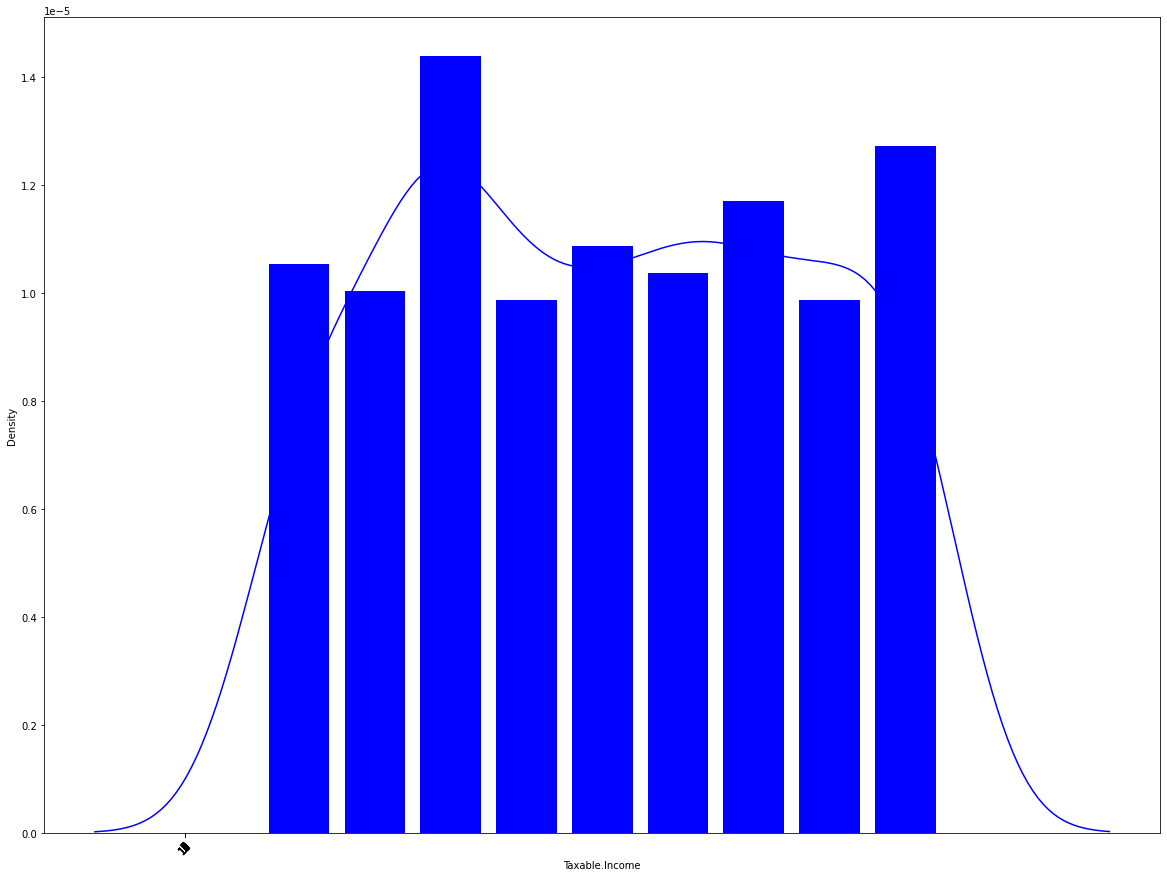

In [9]:
distplot("Taxable.Income")

# Changing the categorical variables into dummies.

In [10]:
fraud1 = pd.get_dummies(fraud)

# Converting the Target variable i.e. Sales into Categorical


In [11]:
fraud1['Category'] = pd.cut(fraud1['Taxable.Income'], 
                        bins=[0,30000, np.inf], 
                        labels=['Risky','Good'],
                        include_lowest=True)
fraud1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Category
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
type_ = ["Medium", "Low", "High"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=fraud['Taxable.Income'].value_counts(), name="Taxable.Income"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sales Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Taxable.Income', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [13]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [14]:
array = fraud1.values
X = array[:,1:10]
Y = array[:,10]

In [15]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(round(results.mean()*100,2))

73.5


# Ensemble techniques


# Bagging

In [16]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7

cart = DecisionTreeClassifier()
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model1, X, Y, cv=kfold)
print(round(results.mean()*100,2))

73.5


# Boosting


# AdaBoost Classification

In [17]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, X, Y, cv=kfold)
print(round(results.mean()*100,2))

73.5


# Stacking


# Stacking Ensemble for Classification

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Iteration = 1

In [19]:
estimators = []
model3 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model3))
model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))
model5 = SVC()
estimators.append(('svm', model5))
model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model6))
model7 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model7))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
results3 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results3.mean()*100)

78.83333333333333


# Iteration = 2

In [20]:
estimators = []
model8 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model8))
model9 = DecisionTreeClassifier()
estimators.append(('cart', model9))
model10 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model10))
model11 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model11))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results4 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results4.mean()*100)

78.83333333333333


# Iteration = 3

In [21]:
estimators = []
model12 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model12))
model13 = DecisionTreeClassifier()
estimators.append(('cart', model13))
model14 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model14))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results5 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results5.mean()*100)

78.33333333333333


# Iteration = 4

In [22]:
estimators = []
model15 = DecisionTreeClassifier()
estimators.append(('cart', model15))
model16 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model16))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results6.mean()*100)

78.33333333333333


# Iteration = 5

In [23]:
estimators = []
model15 = DecisionTreeClassifier()
estimators.append(('logistic', model15))
model16 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model16))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results6.mean()*100)

78.33333333333333
